# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# About Dataset

This is a housing dataset with 545 rows and 13 columns the details are as follows:

* 'price': The price of the house (target variable).
* 'area': The area or size of the house in square feet.
* 'bedrooms': The number of bedrooms in the house.
* 'bathrooms': The number of bathrooms in the house.
* 'stories': The number of stories or floors in the house.
* 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
* 'guestroom': Categorical variable indicating whether the house has a guest room or not.
* 'basement': Categorical variable indicating whether the house has a basement or not.
* 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
* 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
* 'parking': The number of parking spaces available with the house.
* 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
* 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).

# Loading dataset

In [5]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Exploration and cleaning

In [6]:
print("Shape:", df.shape)
print('-'*50)
print('Columnms:', df.columns)

Shape: (545, 13)
--------------------------------------------------
Columnms: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [7]:
df.info() # all datatypes are correct 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.isnull().sum() # there are no null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.duplicated().value_counts() #there are no duplicate values

False    545
Name: count, dtype: int64

In [10]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

# Outlier detection

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


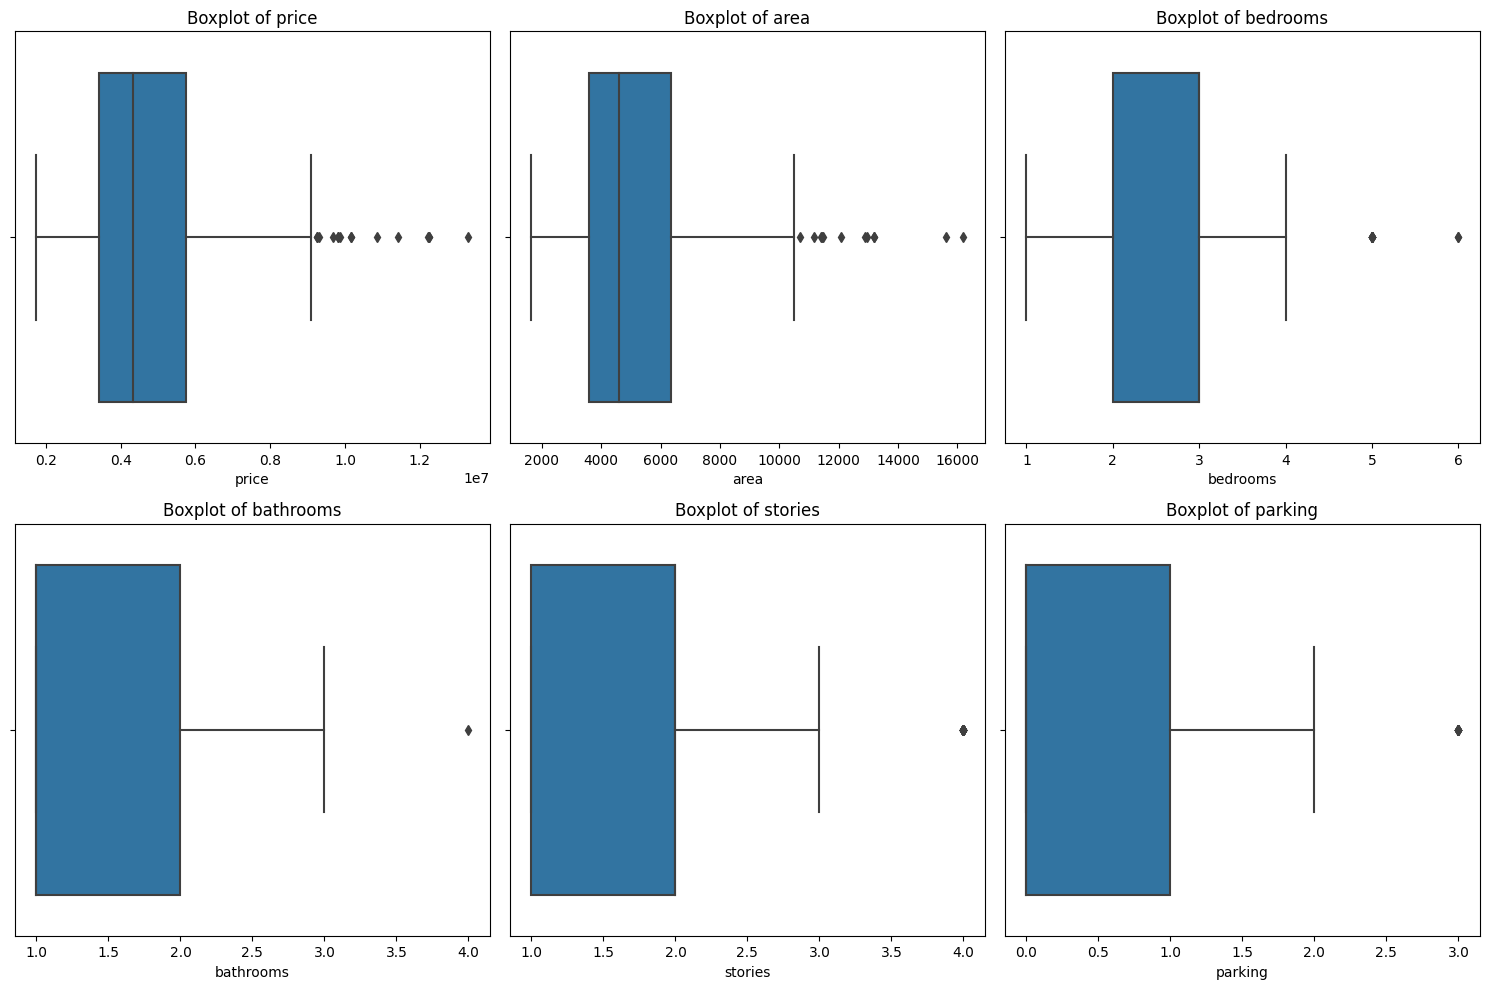

In [12]:
columns_to_plot = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
n = 0
plt.figure(figsize=(15, 10))  

for i in columns_to_plot:
    n += 1
    plt.subplot(2, 3, n) 
    sns.boxplot(x=df[i])  
    plt.title(f'Boxplot of {i}')
    plt.tight_layout()  
plt.show()

In [13]:
#As we can see the outliers through boxplot, removing the outliers from price and area using IQR method

In [14]:
# outlier removal

In [15]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
upper_range=Q3+1.5*IQR
lower_range=Q1-1.5*IQR
outlier=df[(df['price']>upper_range) | (df['price']<lower_range)]
print("lower_range:", lower_range)
print("upper_range:", upper_range)
outlier.head()

lower_range: -35000.0
upper_range: 9205000.0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df = df[(df['price'] > lower_range) & (df['price'] < upper_range)]

In [17]:
Q1=df['area'].quantile(0.25)
Q3=df['area'].quantile(0.75)
IQR= Q3-Q1
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
outlier=df[(df['area']>upper_range) | (df['area']< lower_range)]
print("lower_range:", lower_range)
print("upper_range:", upper_range)
outlier.head()

lower_range: -604.875
upper_range: 10468.125


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished


In [18]:
df = df[(df['area'] > lower_range) & (df['area'] < upper_range)]

In [19]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.568873e+06,4890.108317,2.941973,1.261122,1.794971,0.653772
std,1.594826e+06,1779.173101,0.731701,0.465368,0.865205,0.843380
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000
50%,4.235000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.530000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,10360.000000,6.000000,3.000000,4.000000,3.000000


In [20]:
df.shape

(517, 13)

# Visualization to find Count and Distribution of Categories

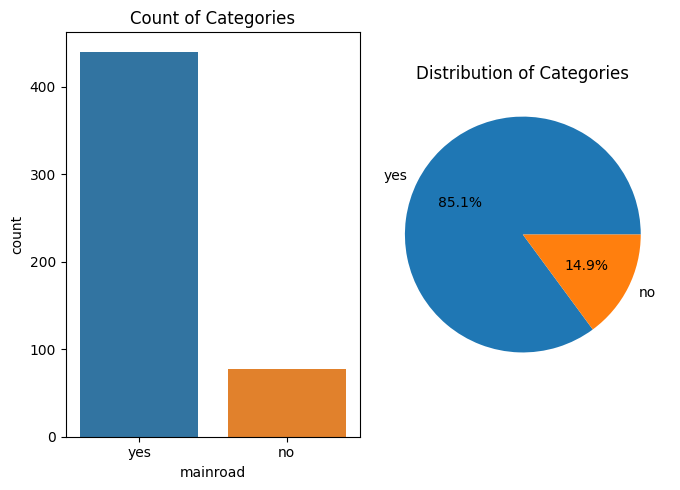

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x='mainroad', data=df)
plt.title('Count of Categories')
plt.subplot(1,3,2)
category_counts = df['mainroad'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

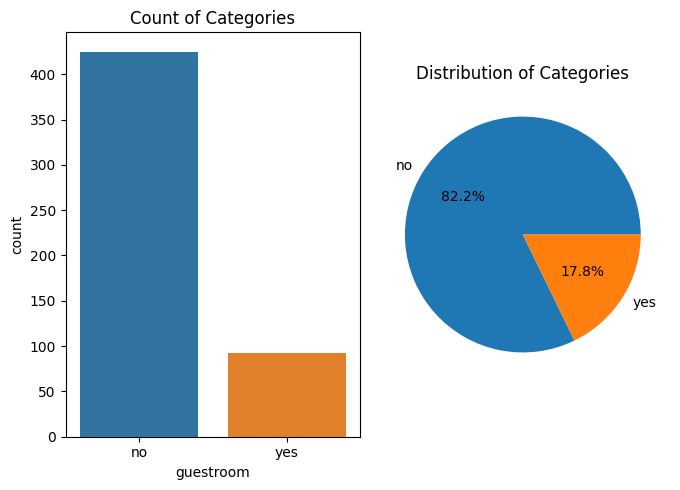

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x='guestroom', data=df)
plt.title('Count of Categories')
plt.subplot(1,3,2)
category_counts = df['guestroom'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

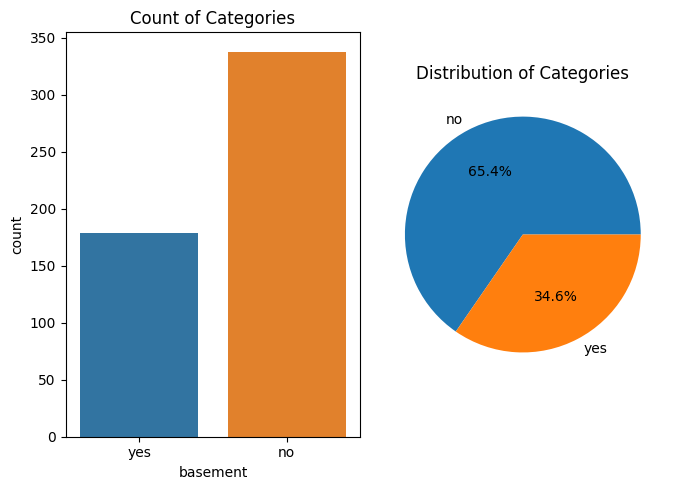

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x='basement', data=df)
plt.title('Count of Categories')
plt.subplot(1,3,2)
category_counts = df['basement'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

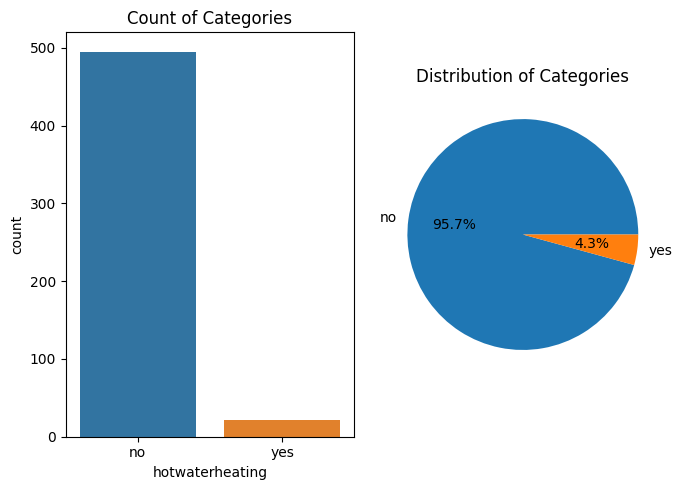

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x='hotwaterheating', data=df)
plt.title('Count of Categories')
plt.subplot(1,3,2)
category_counts = df['hotwaterheating'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

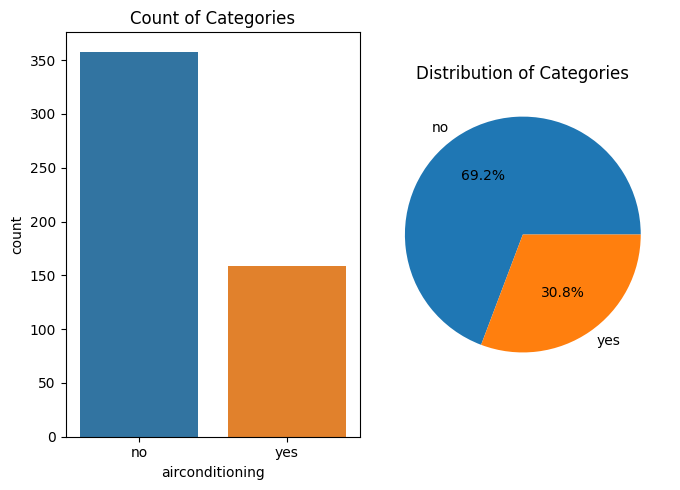

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x='airconditioning', data=df)
plt.title('Count of Categories')
plt.subplot(1,3,2)
category_counts = df['airconditioning'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

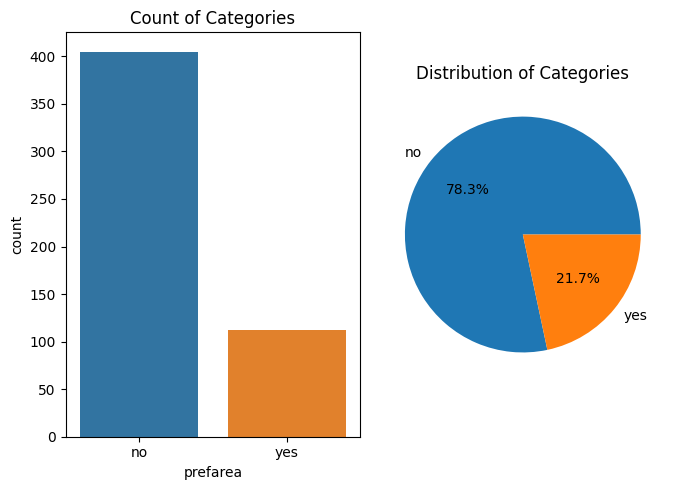

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x='prefarea', data=df)
plt.title('Count of Categories')
plt.subplot(1,3,2)
category_counts = df['prefarea'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

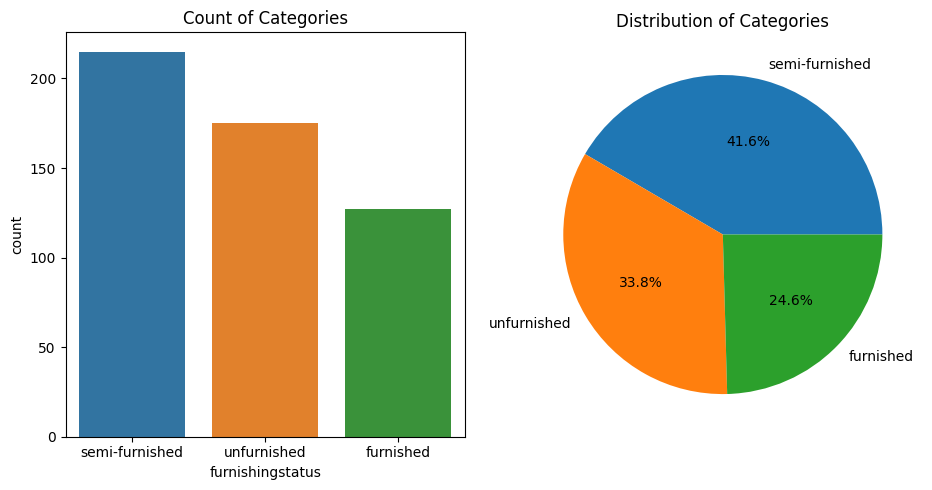

In [27]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.countplot(x='furnishingstatus', data=df)
plt.title('Count of Categories')
plt.subplot(1,3,2)
category_counts = df['furnishingstatus'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

# Correlation plot w.r.t price

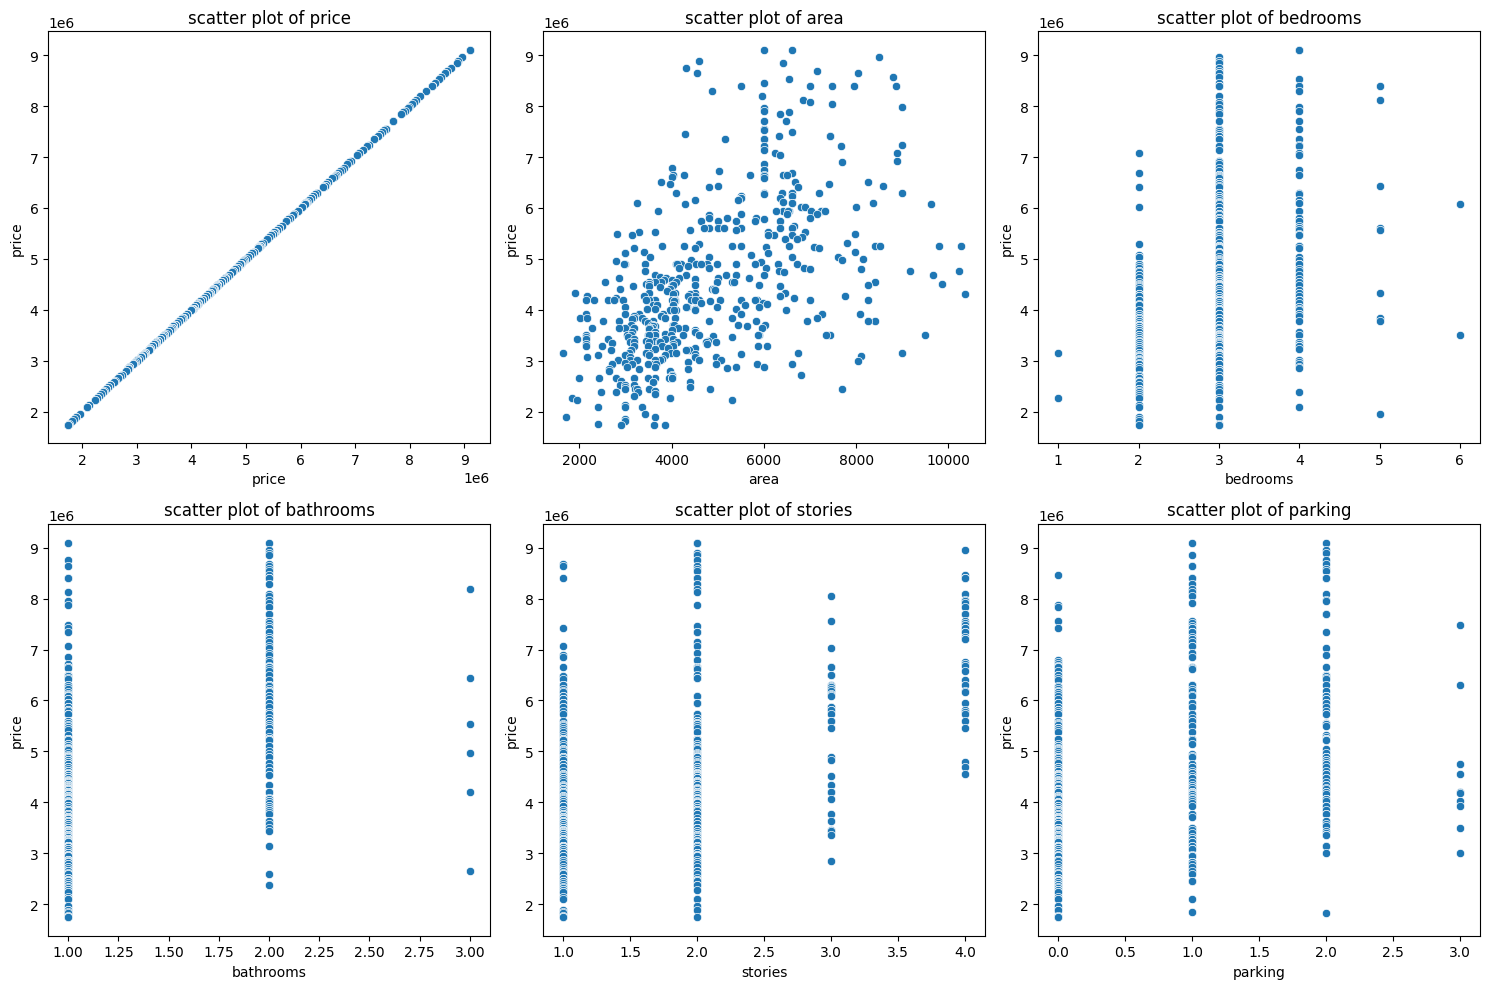

In [28]:
scatter=['price','area','bedrooms','bathrooms','stories', 'parking']
n = 0
plt.figure(figsize=(15, 10))  

for i in columns_to_plot:
    n += 1
    plt.subplot(2, 3, n) 
    sns.scatterplot(x=df[i], y=df['price'])  
    plt.title(f'scatter plot of {i}')
    plt.tight_layout()  
plt.show()

In [29]:
#as we can see area have linear correlation with price 

# Feature Engineering
For implementing Linear Regression. Hence, we need to convert string to numerical values , where 1 is a 'Yes' and 0 is a 'No'.

Also 
* 00 will correspond to furnished
* 01 will correspond to unfurnished
* 10 will correspond to semi-furnished

In [30]:
new_df=df.copy()

In [31]:
new_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             517 non-null    int64 
 1   area              517 non-null    int64 
 2   bedrooms          517 non-null    int64 
 3   bathrooms         517 non-null    int64 
 4   stories           517 non-null    int64 
 5   mainroad          517 non-null    object
 6   guestroom         517 non-null    object
 7   basement          517 non-null    object
 8   hotwaterheating   517 non-null    object
 9   airconditioning   517 non-null    object
 10  parking           517 non-null    int64 
 11  prefarea          517 non-null    object
 12  furnishingstatus  517 non-null    object
dtypes: int64(6), object(7)
memory usage: 56.5+ KB


In [33]:
columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for cols in columns:
    new_df[cols]=new_df[cols].apply(lambda x: 1 if x=='yes' else 0)

In [34]:
new_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [35]:
new_df['semifurnished']=new_df['furnishingstatus'].apply(lambda x: 1 if x=='semi-furnished' else 0)

In [36]:
new_df['unfurnished']=new_df['furnishingstatus'].apply(lambda x: 1 if x=='unfurnished' else 0)

In [37]:
new_df.drop('furnishingstatus', axis=1, inplace=True)

In [38]:
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semifurnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


# Heat map for Correlation

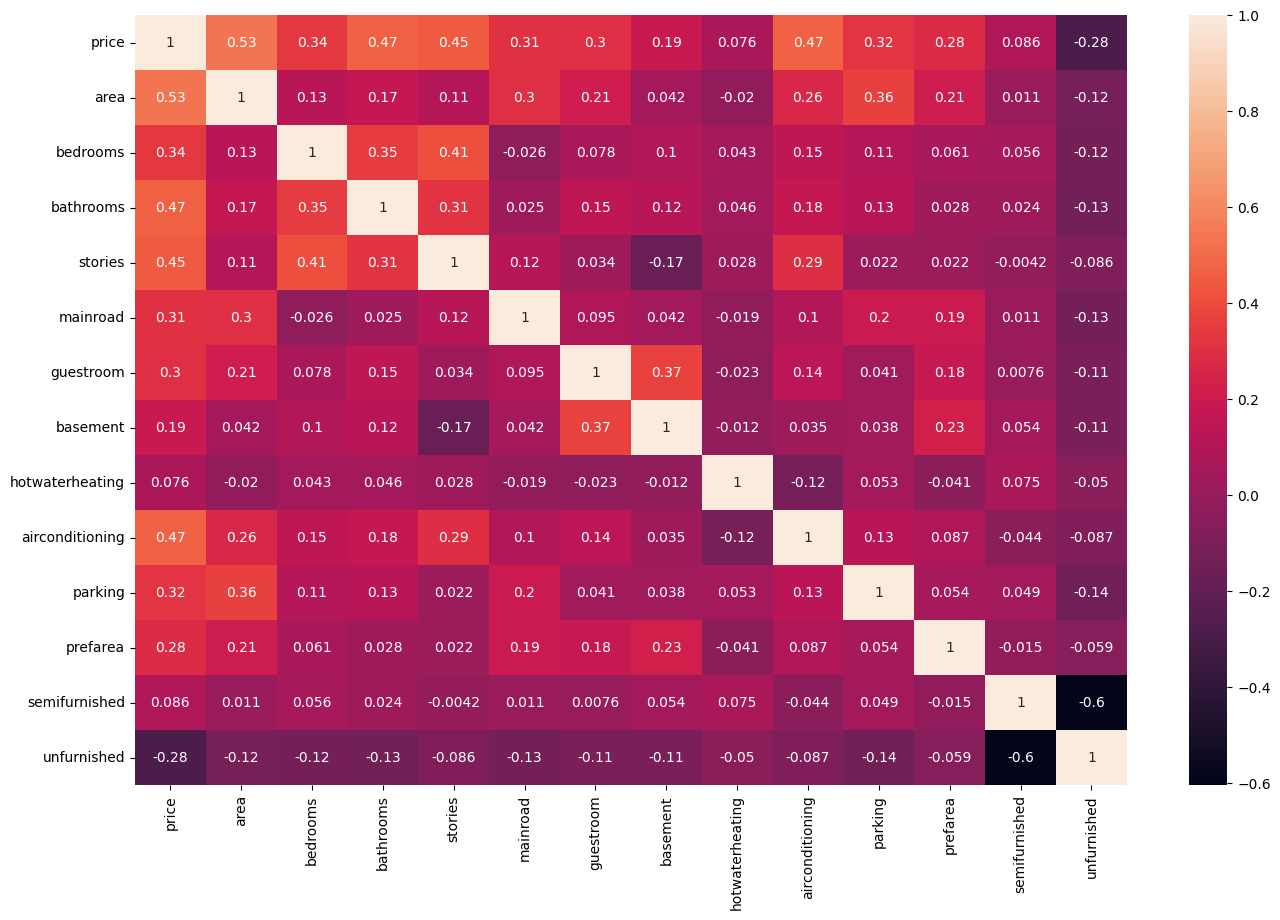

In [39]:
plt.figure(figsize = (16, 10))
sns.heatmap(new_df.corr(), annot = True)
plt.show()

In [40]:
# as we can see price is mostly correlated to area then bathroom, airconditioning and strories

# Modeling

I will perform a simple linear regression on the dataset to predict house prices. In order to train out the regression model, we need to first split up the data into an X list that contains the features to train on, and a y list with the target variable.

# Splitting into training and test data

In [41]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semifurnished,unfurnished
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
287,4200000,5500,3,1,2,1,0,0,0,1,0,0,0,1
166,5320000,7800,3,1,1,1,0,1,0,1,2,1,0,1
176,5250000,8520,3,1,1,1,0,0,0,1,2,0,0,0
282,4270000,2175,3,1,2,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,4095000,4040,2,1,2,1,0,0,0,0,1,0,1,0
36,8043000,7482,3,2,3,1,0,0,1,0,1,1,0,0
298,4200000,5800,3,1,1,1,0,0,1,0,2,0,1,0
435,3290000,4040,2,1,1,1,0,0,0,0,0,0,0,1


# Scaling
* Scaling data is necessary to ensure that all features are on a similar scale or magnitude. When working with a dataset, it is common for different features to have different scales or units of measurement. Failure to scale the data can lead to biased or inefficient model performance.

# Scaling training data using MinMaxScaler

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']] = scaler.fit_transform(df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']])

In [44]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semifurnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preparing  training data and target variable  for a machine learning model

In [45]:
y_train = df_train.pop('price')
x_train = df_train

In [46]:
y_train.head()

148    0.523810
236    0.390476
356    0.275238
425    0.219048
516    0.095238
Name: price, dtype: float64

In [47]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semifurnished,unfurnished
148,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# linear regression
* Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best-fitting linear equation that describes the relationship between these variables.


In [49]:
model=LinearRegression()

# RFE
* RFE stands for Recursive Feature Elimination. It is a feature selection technique commonly used in machine learning to select the most important features (or variables) for a predictive model. 

In [50]:
rfe = RFE(estimator=model, n_features_to_select=6)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [51]:
#selected features
col=x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [52]:
# features not selected
x_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semifurnished', 'unfurnished'],
      dtype='object')

In [53]:
x_train_rfe=x_train[col]
x_train_rfe

,area,bathrooms,stories,airconditioning,parking,prefarea
148,0.526907,0.0,0.666667,0,0.000000,1
236,0.114134,0.0,0.333333,0,0.000000,1
356,0.072738,0.5,0.000000,1,0.333333,0
425,0.151390,0.0,0.000000,0,0.666667,0
516,0.157895,0.0,0.000000,0,0.333333,0
...,...,...,...,...,...,...
255,0.470727,0.0,0.000000,1,0.333333,0
307,0.257244,0.0,0.333333,0,0.666667,0
72,0.368421,0.0,1.000000,1,0.000000,1
377,0.111768,0.5,0.333333,0,0.000000,1


# Adding constant variable to test dataframe

* if we are not adding constant variable we are forcing regression line to go through origin

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)
x_train_rfe.head()

,const,area,bathrooms,stories,airconditioning,parking,prefarea
148,1.0,0.526907,0.0,0.666667,0,0.000000,1
236,1.0,0.114134,0.0,0.333333,0,0.000000,1
356,1.0,0.072738,0.5,0.000000,1,0.333333,0
425,1.0,0.151390,0.0,0.000000,0,0.666667,0
516,1.0,0.157895,0.0,0.000000,0,0.333333,0


In [55]:
# fitting in the model

model.fit(x_train_rfe, y_train)

LinearRegression()

In [56]:
model.score(x_train_rfe, y_train)

0.6114151595523418

In [57]:
y_train_price = model.predict(x_train_rfe)

In [58]:
per_error = 100*(y_train_price-y_train)/y_train

df_prd_tst = pd.DataFrame({'Predicted Price':y_train_price, 'Actual Price':y_train, '% Error':per_error})
df_prd_tst

,Predicted Price,Actual Price,% Error
148,0.529984,0.523810,1.178802
236,0.322657,0.390476,-17.368286
356,0.365862,0.275238,32.925796
425,0.229987,0.219048,4.994004
516,0.198615,0.095238,108.545752
...,...,...,...
255,0.404629,0.371429,8.938697
307,0.329845,0.328571,0.387559
72,0.633757,0.676190,-6.275402
377,0.422420,0.257143,64.274302


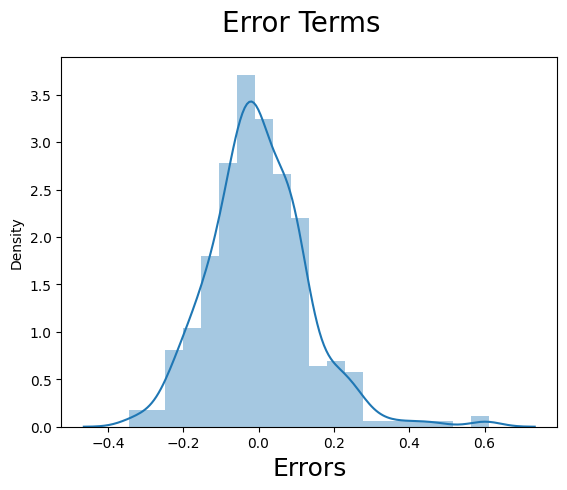

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   
plt.show()

#### Errors are close to normally distributed which indicates that linear regression analysis is based on reliable assumptions and provides accurate insights into the relationship between variables

# Testing our model

# Scaling test data using MinMaxScaler

In [60]:
df_test[['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']] = scaler.fit_transform(df_test[['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']])

In [61]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semifurnished,unfurnished
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.377169,0.383977,2.916667,0.137821,0.256410,0.794872,0.198718,0.339744,0.051282,0.294872,0.215812,0.237179,0.275641,0.416667
std,0.235895,0.214846,0.699846,0.251279,0.290460,0.405096,0.400320,0.475147,0.221283,0.457454,0.267216,0.426723,0.448276,0.494594
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.201923,0.227008,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.334135,0.364377,3.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.512019,0.511350,3.000000,0.125000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preparing test data and target variable  for a machine learning model

In [62]:
y_test = df_test.pop('price')
x_test = df_test

In [63]:
x_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semifurnished,unfurnished
244,0.427241,3,0.0,0.333333,1,1,1,0,0.0,0.000000,1.0,1,0
287,0.448196,3,0.0,0.333333,1,0,0,0,1.0,0.000000,0.0,0,1
166,0.715949,3,0.0,0.000000,1,0,1,0,1.0,0.666667,1.0,0,1
176,0.799767,3,0.0,0.000000,1,0,0,0,1.0,0.666667,0.0,0,0
282,0.061118,3,0.0,0.333333,0,1,1,0,1.0,0.000000,0.0,0,1


In [64]:
# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)

In [65]:
x_test_rfe=x_test[x_train_rfe.columns]
x_test_rfe.head()

,const,area,bathrooms,stories,airconditioning,parking,prefarea
244,1.0,0.427241,0.0,0.333333,0.0,0.000000,1.0
287,1.0,0.448196,0.0,0.333333,1.0,0.000000,0.0
166,1.0,0.715949,0.0,0.000000,1.0,0.666667,1.0
176,1.0,0.799767,0.0,0.000000,1.0,0.666667,0.0
282,1.0,0.061118,0.0,0.333333,1.0,0.000000,0.0


In [66]:
#prediction
y_pred = model.predict(x_test_rfe)

In [67]:
# Plotting scatterplot with best fit line

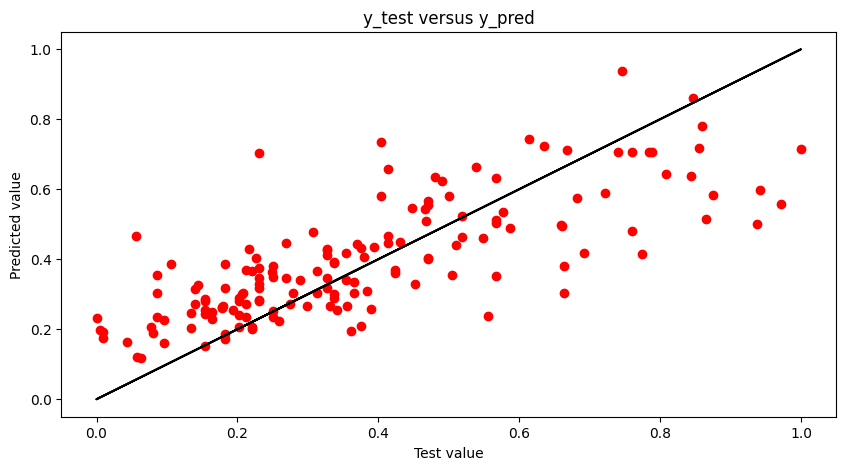

In [68]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test,y_pred, c='red')
x_test=y_test
plt.plot(x_test,y_test,c='k')   
plt.title('y_test versus y_pred')
plt.xlabel('Test value')                         
plt.ylabel('Predicted value') 
plt.show()

# Evaluating the model's performance using metrics such as Mean Squared Error or R-squared.

# R squared or Coefficient of Determination: 
* The most commonly used metric for model evaluation in regression analysis is R squared. It can be defined as a Ratio of variation to the Total Variation. The value of R squared lies between 0 to 1, the value closer to 1 the better the model.

# Mean Squared Error (MSE)
* Another Common metric for evaluation is Mean squared error which is the mean of the squared difference of actual vs predicted values.

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score:',r2_score(y_test, y_pred)) # the value closer to 1 the better the model.
print('Mean_squre_error;', mean_squared_error(y_test, y_pred)) #Lower MSE values indicate better model performance 

R2 score: 0.5791247774397739
Mean_squre_error; 0.023270097034741123


# Getting percentage of error between Actual and predicted price

In [70]:
per_error = 100*(y_pred-y_test)/y_test

prd_tst = pd.DataFrame({'Predicted Price':y_pred, 'Actual Price':y_test, '% Error':per_error})
prd_tst.sample(10)

,Predicted Price,Actual Price,% Error
432,0.289443,0.201923,43.343108
290,0.412784,0.326923,26.263451
98,0.744328,0.614423,21.142546
512,0.227500,0.096154,136.600477
18,0.557086,0.971154,-42.636688
455,0.266412,0.179808,48.164795
123,0.504188,0.567308,-11.126268
478,0.285608,0.153846,85.645141
124,0.631016,0.567308,11.229869
397,0.316570,0.230769,37.180488


# Thank you
